In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16224\820348329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16224\820348329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [27]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [28]:
df.drop(columns=['Name','Ticket','PassengerId'], inplace=True)

In [29]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8100558659217877


In [32]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7877094972067039


In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8268156424581006


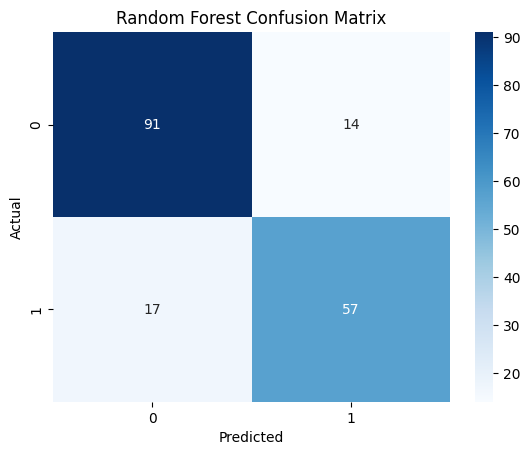

In [34]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [35]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_tuned))

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.8044692737430168


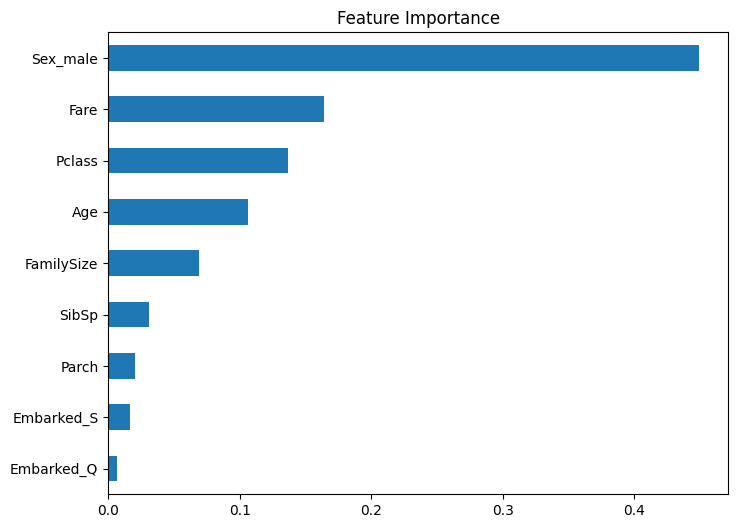

In [36]:
importances = best_rf.feature_importances_

feature_imp = pd.Series(importances, index=X.columns)
feature_imp.sort_values().plot(kind='barh', figsize=(8,6))

plt.title("Feature Importance")
plt.show()

In [37]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_before = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy (Before Tuning):", dt_before)

Decision Tree Accuracy (Before Tuning): 0.7877094972067039


In [38]:
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [39]:
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)
dt_after = accuracy_score(y_test, y_pred_dt_tuned)

print("Best Parameters:", grid_dt.best_params_)
print("Decision Tree Accuracy (After Tuning):", dt_after)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy (After Tuning): 0.7988826815642458


In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_before = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy (Before Tuning):", rf_before)

Random Forest Accuracy (Before Tuning): 0.8268156424581006


In [41]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
rf_after = accuracy_score(y_test, y_pred_rf_tuned)

print("Best Parameters:", grid_rf.best_params_)
print("Random Forest Accuracy (After Tuning):", rf_after)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'Random Forest']
before = [dt_before, rf_before]
after = [dt_after, rf_after]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, before, width, label='Before Tuning')
plt.bar(x + width/2, after, width, label='After Tuning')

plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title("Model Performance Before vs After Tuning")
plt.legend()
plt.show()